![Screenshot 1445-03-28 at 3.53.28 PM.png](attachment:697ab148-b7c6-4dad-bb2d-d4c070f3c57d.png)

**Table Of Content:**

    1- Goal Of Collecting Dataset. ✔️
    2- Source of Dataset. ✔️
    3- General Information about Dataset:
        a. number and type of variables. ✔️
        b. number of observation. ✔️
        c. number of labels.✔️
    4- Summary of Dataset:
        a. sample of raw. ✔️
        b. variables distribution.✔️
        c. missing values. ✔️
        d. statistical summaries. ✔️
    5- Preprocessing Technique Used. ✔️
    

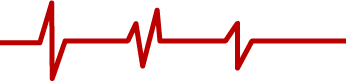
> ## 1- Goal of collecting Dataset:

   Utilizing a stroke dataset for a machine learning (ML) project offers the opportunity to harness the power of data-driven insights to address key aspects of stroke prevention, diagnosis, and treatment. 

   By employing ML algorithms and techniques, We can develop predictive models to identify individuals at risk of stroke, improve diagnostic accuracy, and optimize treatment recommendations. Additionally, the dataset can serve as a valuable resource for feature engineering, training and testing ML models, and evaluating their performance. 
    
   The ultimate goal is to create tools and solutions that can positively impact stroke patients' lives by enabling earlier intervention and better healthcare decisions based on data-driven insights.

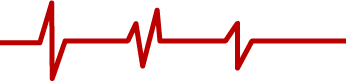
> ## 2- Source of Dataset:

  According to the World Health Organization (WHO), stroke stands as the second leading cause of death worldwide, accounting for approximately 11% of total deaths.This alarming prevalence underscores the significance of our selection of the 'Stroke Prediction Dataset'.

  The "Stroke Prediction Dataset" is a valuable resource available on Kaggle, a popular platform for data science and machine learning enthusiasts. This dataset is utilized to forecast the likelihood of a patient experiencing a stroke by considering input parameters such as gender, age, various diseases, and smoking status. Each data entry in the dataset offers pertinent information about the patient.

here is the link of the dataset: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data


..

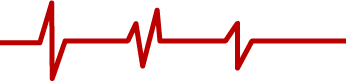
> ## 3- General Information about Dataset:

First, we'll import libraries then read CSV file. 

In [33]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [91]:
import import_ipynb

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
#from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('healthcare-dataset-stroke-data.csv')

**a. number and type of variables:**

we have 11 variables which are:    
    
    1. id: unique identifier as int.
    
    2. gender: "Male", "Female" or "Other" as object.
        
    3. age: age of the patient as float.
    
    4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension as int.

    5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease as int.

    6. ever_married: "No" or "Yes" as object.

    7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" as object.

    8. Residence_type: "Rural" or "Urban" as object.

    9. avg_glucose_level: average glucose level in blood as float.

    10. bmi: body mass index as float.

    11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* as object.


*Note: "Unknown" in smoking_status means that the information is unavailable for this patient.

As an output, there is:
stroke: 1 if the patient had a stroke or 0 if not as int.

**b. number of observation:**

In [94]:
df.shape

(5110, 12)

There exists 5110 instances of observation.

**c. number of labels:**

the lables are: 
has a stroke = 1 or No stroke = 0.

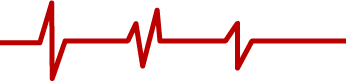
> ## 4- Summary of Dataset:

**a. sample of raw data.**

In [95]:
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**b. variables distribution:**

we'll take about (Gender, Hypertension, Heart disease, Married, Work Type, Residence type, Smoking status, Stroke), others ( Gender, Average glucose level, BMI ) will be disscussed in the statistical part.

> **1.Gender:**

In [96]:
print (f'{round(df["gender"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="gender", title='Gender', width=400, height=400)
fig.show()

gender
Female    58.59
Male      41.39
Other      0.02
Name: proportion, dtype: float64


> **2.Hypertension:**

In [97]:
print (f'{round(df["hypertension"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="hypertension", title='hypertension', width=400, height=400)
fig.show()

hypertension
0    90.25
1     9.75
Name: proportion, dtype: float64


> **3. Heart Disease:**

In [98]:
print (f'{round(df["heart_disease"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="heart_disease", title='heart_disease', width=400, height=400)
fig.show()

heart_disease
0    94.6
1     5.4
Name: proportion, dtype: float64


> **4. Married:**

In [99]:
print (f'{round(df["ever_married"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="ever_married", title='ever_married', width=400, height=400)
fig.show()

ever_married
Yes    65.62
No     34.38
Name: proportion, dtype: float64


> **5. Work Type:**

In [100]:
print (f'{round(df["work_type"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="work_type", title='work_type', width=400, height=400)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

work_type
Private          57.24
Self-employed    16.03
children         13.44
Govt_job         12.86
Never_worked      0.43
Name: proportion, dtype: float64


> **6. Residence Type:**

In [101]:
print (f'{round(df["Residence_type"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="Residence_type", title='Residence_type', width=400, height=400)
fig.show()

Residence_type
Urban    50.8
Rural    49.2
Name: proportion, dtype: float64


> **7. Smoking Status:**

In [103]:
print (f'{round(df["smoking_status"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="smoking_status", title='smoking_status', width=400, height=400)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

smoking_status
never smoked       37.03
Unknown            30.22
formerly smoked    17.32
smokes             15.44
Name: proportion, dtype: float64


> **8. Stroke:**

In [104]:
fig = px.histogram(df, x="stroke", title='Stroke', width=400, height=400)
fig.show()

# 0 means No Stroke, 1 means Stroke

**c. missing values:**

In [105]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
bmi,201,0.039335
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000


> **1. BMI:**

We have missing values on the 'bmi', which is at around %4.
We will handle it in the Preprocessing part.

**d. statistical summaries with mean and variance:**

> **1. Categorical:**

In [109]:
#we divide the implementation since type of Hypertension and Heart disease are int, others where object(String)
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
'work_type', 'Residence_type', 'smoking_status']

df[categorical].describe()

,hypertension,heart_disease
count,5110.000000,5110.000000
mean,0.097456,0.054012
std,0.296607,0.226063
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [110]:
cl = list(df.dtypes[df.dtypes == 'object'].index)
df[cl].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


> **2. Numerical:**

In [111]:
numerical = ['age','avg_glucose_level', 'bmi']
df[numerical].describe()


,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [112]:
#variance of numerical data:
print( df[numerical].var() )

age                   511.331792
avg_glucose_level    2050.600820
bmi                    61.686364
dtype: float64


We have three numerical features in our dataset.

All of our numerical features are measured in different scales.

Many machine learning algorithms perform better standard range scaled numerical variables (such as Linear models,artificial neural networks, K-nearest Neighbors,support vector machines, etc.)

Tree models (such as, decision trees,random forest, etc.) work fine with different range numerical features.

let's see the Skewness.

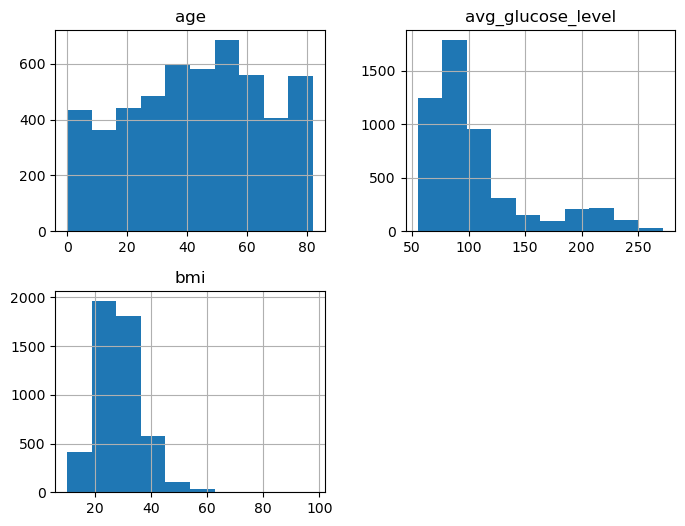

In [113]:
df[numerical].skew()

df[numerical].hist(figsize=(8,6));

Based on the result, age has slight left skew, other two features have right tail, positively skewed shape distribution.

For that reason we will standardize the raw data and then apply Yoe-Johnson transform method in Ph2.

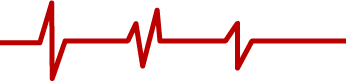
> ## 5- Preprocessing Technique Used.

> 1. Variable Removal for ID:

there is no need for ID since it not relevant or effect the prediction of having a stroke or not. So, we will remove it.

In [116]:
df = df.drop('id', axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


> 2. Missing Value of BMI:

we will solve the problem by using mean imputation, we can see in the graph that no messing values exist.

In [117]:
df['bmi'].fillna(df['bmi'].mean(), inplace = True)
#Checking Missing Values after imputing
display(df.isnull().sum().to_frame().reset_index().rename({'index' : 'Variables', 0: 'Missing Values'}, axis =1).style.background_gradient('copper_r'))

,Variables,Missing Values
0,gender,0
1,age,0
2,hypertension,0
3,heart_disease,0
4,ever_married,0
5,work_type,0
6,Residence_type,0
7,avg_glucose_level,0
8,bmi,0
9,smoking_status,0


> 3. Unusual Category Removal:

we have Unknown category in Smoking status that should be removed.

In [118]:
#Dropping the unusual category from the dataset
df.drop(df.loc[df['smoking_status']=='Unknown'].index, inplace=True)
df.shape

(3566, 11)

In [119]:
#Resetting index after Records Removal
df.reset_index(drop=True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
3561,Female,57.0,0,0,Yes,Private,Rural,77.93,21.700000,never smoked,0
3562,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
3563,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
3564,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0


> 4. Cleaning Categorical Data: White Space Removal and unified style of letters:

In [126]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
categorical
for col in categorical:
    df[col] = df[col].str.lower().str.replace(" ", "_")

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,67.0,0,1,yes,private,urban,228.69,36.600000,formerly_smoked,1
1,female,61.0,0,0,yes,self-employed,rural,202.21,28.893237,never_smoked,1
2,male,80.0,0,1,yes,private,rural,105.92,32.500000,never_smoked,1
3,female,49.0,0,0,yes,private,urban,171.23,34.400000,smokes,1
4,female,79.0,1,0,yes,self-employed,rural,174.12,24.000000,never_smoked,1


here, we remove spaces and unified style of strings to be small and _ between words.

> 5. Checking for duplicate rows:

In [127]:
display("Total number of of Duplicates present in data: %s" %df.duplicated().sum())

'Total number of of Duplicates present in data: 0'

So, there are no diplication in our dataset. 

> 6. checking wether data is balance or not:

In [128]:
#Checking if the dataset is balanced or not
df.stroke.value_counts()

stroke
0    3364
1     202
Name: count, dtype: int64

In [129]:

fig = px.histogram(df, x="stroke", title='Stroke', width=400, height=400)
fig.show()

we can see that data set is highly imbalanced, where only 249 from 5110.. It is better to resample the dataset to make it balanced and for proper prediction using oversampling.

In [130]:
from sklearn.utils import resample

# Separate Target Classes
df_1 = df[df.stroke==0]
df_2 = df[df.stroke==1]
 
# Upsample minority class
df_2_upsampled = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=3364,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_1, df_2_upsampled])
 
# Display new class counts
df_upsampled.stroke.value_counts()


stroke
0    3364
1    3364
Name: count, dtype: int64

In [131]:
df_upsampled.reset_index(drop=True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,58.0,1,0,yes,private,urban,87.96,39.2,never_smoked,0
1,female,70.0,0,0,yes,private,rural,69.04,35.9,formerly_smoked,0
2,female,52.0,0,0,yes,private,urban,77.59,17.7,formerly_smoked,0
3,female,75.0,0,1,yes,self-employed,rural,243.53,27.0,never_smoked,0
4,female,32.0,0,0,yes,private,rural,77.67,32.3,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...
6723,female,70.0,0,1,yes,private,rural,239.07,26.1,never_smoked,1
6724,female,57.0,1,0,yes,govt_job,rural,67.41,32.9,never_smoked,1
6725,male,78.0,0,0,yes,self-employed,urban,116.10,27.1,never_smoked,1
6726,male,59.0,0,0,yes,private,urban,86.23,30.0,formerly_smoked,1
